# DataJoint U24 - Workflow Volume

## Introduction

This notebook introduces some useful DataJoint concepts for exploring pipelines featuring Element Volume.

+ DataJoint needs to be configured before running this notebook (see [01-Configure](./01-Configure.ipynb)).
+ Those familiar with the structure of DataJoint workflows can skip to [03-Explore](./03-Explore.ipynb).

To load the local config, we move to the package root.

In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

## Schemas, Diagrams and Tables

Schemas are conceptually related sets of tables. By importing schemas from `workflow_volume.pipeline`, we'll declare the tables on the server with the prefix in the config (if we have permission to do so). If these tables are already declared, we'll gain access. 

- `dj.list_schemas()` lists all schemas a user has access to in the current database
- `<schema>.schema.list_tables()` will provide names for each table in the format used under the hood.

In [2]:
import datajoint as dj
from workflow_volume.pipeline import lab, subject, session, scan, volume
# dj.list_schemas()

[2023-03-28 10:43:18,127][INFO]: Connecting kushalbakshitest@tutorial-db.datajoint.io:3306
[2023-03-28 10:43:18,619][INFO]: Connected kushalbakshitest@tutorial-db.datajoint.io:3306


In [ ]:
dj.list_schemas()

In [ ]:
volume.schema.list_tables()

`dj.Diagram()` plots tables and dependencies in a schema. To see additional upstream or downstream connections, add `- N` or `+ N`.

- `volume`: Tables related to volumetric data
- `bossdb`: Schema to manage BossDB urls for each data type. This could be replaced by a similar schema featuring URLs to another endpoint.

In [ ]:
from element_volume.bossdb import *

In [ ]:
from element_volume.volume import *

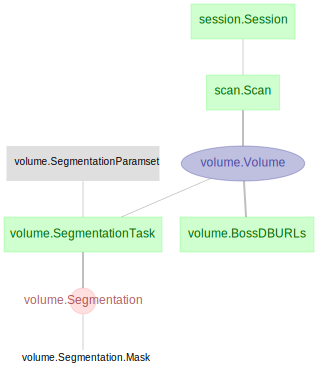

In [3]:
dj.Diagram(session.Session) + dj.Diagram(scan.Scan) + dj.Diagram(volume)

`volume.Volume` is a central table where volumetric data can be ingested, either from images on disk or downloaded from BossDB. The various *task* tables can be used to cue up analysis or ingestion of the various subsequent data types (i.e., segmentation and connectome data. Each segmented cell can be matched with data from another source (e.g., Element Calcium Imaging's `Segmentation.Mask`).

In [ ]:
volume.schema

In [ ]:
dj.Diagram(volume) - 1

### Table Types

- **Manual table**: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
- **Lookup table**: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
- **Imported table**: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
- **Computed table**: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for     
- **Part table**: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

### Table Links

- **One-to-one primary**: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
- **One-to-many primary**: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
- **Secondary dependency**: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

## Common Table Functions


- `<table>()` show table contents
- `heading` shows attribute definitions
- `describe()` show table defintiion with foreign key references

In [ ]:
volume.Resolution()

In [ ]:
volume.Volume.heading

In [ ]:
volume.Segmentation.describe()

## Other Elements installed with the workflow

- [`lab`](https://github.com/datajoint/element-lab): lab management related information, such as Lab, User, Project, Protocol, Source.
- [`subject`](https://github.com/datajoint/element-animal): general animal information, User, Genetic background, Death etc.
- [`session`](https://github.com/datajoint/element-session): general information of experimental sessions.
- [`calcium-imaging`](https://github.com/datajoint/element-calcium-imaging): imaging schema for generating activity traces. These can be mapped to cells in `volume.Connectome`

For more information about these Elements, see [workflow session](https://github.com/datajoint/workflow-session) or [workflow calcium imaging](https://github.com/datajoint/workflow-calcium-imaging).

In [ ]:
dj.Diagram(lab) + dj.Diagram(subject) + dj.Diagram(session)

In [ ]:
session.Session.describe()

## Summary and next step

- This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

- The [next notebook](./03-Explore.ipynb) will introduce the detailed steps to run through `workflow-volume`.